# 測試集成式模型是否會得到較好的結果

Dataset: [Dry Bean Dataset](https://www.kaggle.com/datasets/muratkokludataset/dry-bean-dataset)
 <br>
<br>
Relevant Information: <br>
Seven different types of dry beans were used in this research, taking into account the features such as form, shape, type, and structure by the market situation. A computer vision system was developed to distinguish seven different registered varieties of dry beans with similar features in order to obtain uniform seed classification. For the classification model, images of 13,611 grains of 7 different registered dry beans were taken with a high-resolution camera. Bean images obtained by computer vision system were subjected to segmentation and feature extraction stages, and a total of 16 features; 12 dimensions and 4 shape forms, were obtained from the grains.
<br>
<br>
Attribute Information: <br>
1. Area (A): The area of a bean zone and the number of pixels within its boundaries.
2. Perimeter (P): Bean circumference is defined as the length of its border.
3. Major axis length (L): The distance between the ends of the longest line that can be drawn from a bean.
4. Minor axis length (l): The longest line that can be drawn from the bean while standing perpendicular to the main axis.
5. Aspect ratio (K): Defines the relationship between L and l.
6. Eccentricity (Ec): Eccentricity of the ellipse having the same moments as the region.
7. Convex area (C): Number of pixels in the smallest convex polygon that can contain the area of a bean seed.
8. Equivalent diameter (Ed): The diameter of a circle having the same area as a bean seed area.
9. Extent (Ex): The ratio of the pixels in the bounding box to the bean area.
10. Solidity (S): Also known as convexity. The ratio of the pixels in the convex shell to those found in beans.
11. Roundness (R): Calculated with the following formula: (4piA)/(P^2)
12. Compactness (CO): Measures the roundness of an object: Ed/L
13. ShapeFactor1 (SF1)
14. ShapeFactor2 (SF2)
15. ShapeFactor3 (SF3)
16. ShapeFactor4 (SF4)
17. Class (Seker, Barbunya, Bombay, Cali, Dermosan, Horoz and Sira)

In [1]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt-
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import (confusion_matrix, classification_report, roc_curve, auc, precision_recall_curve, RocCurveDisplay)
from xgboost import XGBClassifier

# 1. Data Desciption & Data Preprocess

## 1.1 Data Analysis

In [2]:
df = pd.read_excel('Dry_Bean_Dataset.xlsx')
df.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


In [3]:
df.shape

(13611, 17)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13611 non-null  int64  
 1   Perimeter        13611 non-null  float64
 2   MajorAxisLength  13611 non-null  float64
 3   MinorAxisLength  13611 non-null  float64
 4   AspectRation     13611 non-null  float64
 5   Eccentricity     13611 non-null  float64
 6   ConvexArea       13611 non-null  int64  
 7   EquivDiameter    13611 non-null  float64
 8   Extent           13611 non-null  float64
 9   Solidity         13611 non-null  float64
 10  roundness        13611 non-null  float64
 11  Compactness      13611 non-null  float64
 12  ShapeFactor1     13611 non-null  float64
 13  ShapeFactor2     13611 non-null  float64
 14  ShapeFactor3     13611 non-null  float64
 15  ShapeFactor4     13611 non-null  float64
 16  Class            13611 non-null  object 
dtypes: float64(1

In [5]:
df.isnull().sum()

Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
Class              0
dtype: int64

## 1.2 Target Info

In [6]:
df['Class'].unique()

array(['SEKER', 'BARBUNYA', 'BOMBAY', 'CALI', 'HOROZ', 'SIRA', 'DERMASON'],
      dtype=object)

In [7]:
df['Class'].value_counts()

Class
DERMASON    3546
SIRA        2636
SEKER       2027
HOROZ       1928
CALI        1630
BARBUNYA    1322
BOMBAY       522
Name: count, dtype: int64

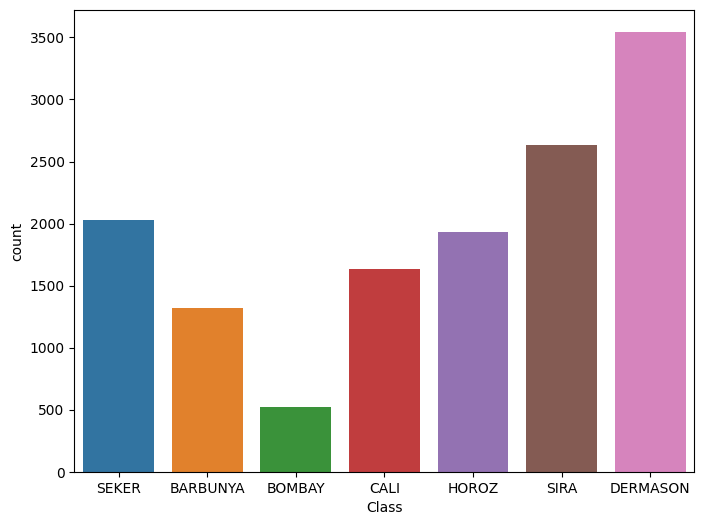

In [8]:
plt.figure(figsize=(8,6))
sns.countplot(x='Class', data=df)
plt.show()

## 1.3 Correlation Heatmap

In [9]:
X = df.drop(columns='Class')
y = df['Class']

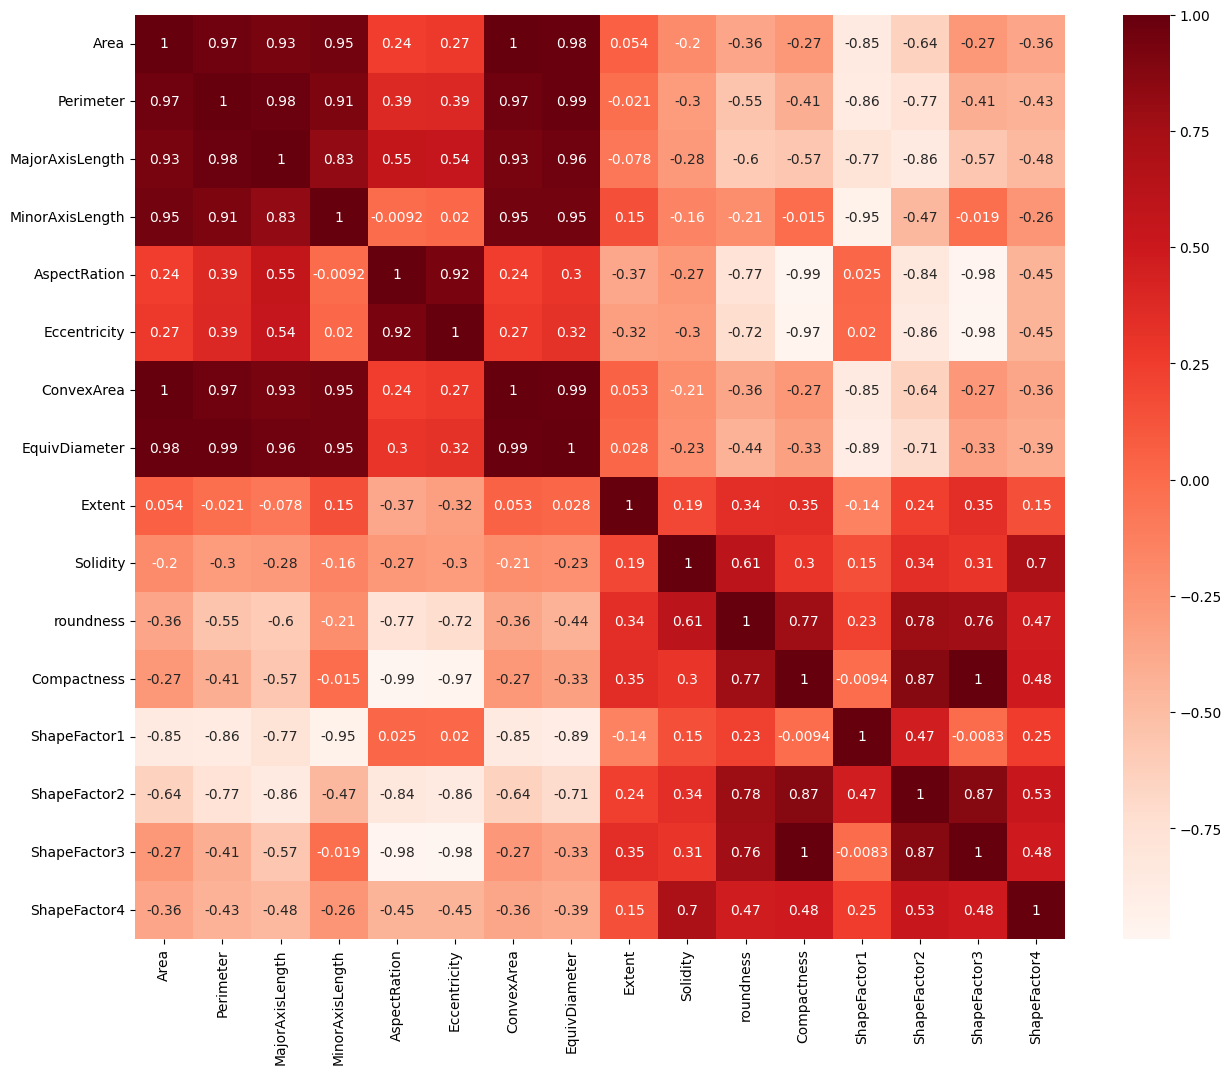

In [10]:
plt.figure(figsize=(15,12))
cor = X.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

## 1.4 Dataset Split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.9, shuffle=True)

# 2. Training

## 2.1 Decision Tree

In [12]:
DecisionTreeClassifierModel = DecisionTreeClassifier(criterion='gini',max_depth=12,random_state=44)
DecisionTreeClassifierModel.fit(X_train, y_train)

print('DecisionTreeClassifierModel Train Score is : ' , DecisionTreeClassifierModel.score(X_train, y_train))
print('DecisionTreeClassifierModel Test Score is : ' , DecisionTreeClassifierModel.score(X_test, y_test))

DecisionTreeClassifierModel Train Score is :  0.9784472201812393
DecisionTreeClassifierModel Test Score is :  0.8964757709251101


In [13]:
y_pred_DT = DecisionTreeClassifierModel.predict(X_test)
y_pred_DT_proba = DecisionTreeClassifierModel.predict_proba(X_test)

In [14]:
## Accuracy, Precision, Recall, F1-score
print(classification_report(y_test, y_pred_DT))

              precision    recall  f1-score   support

    BARBUNYA       0.89      0.91      0.90       141
      BOMBAY       1.00      1.00      1.00        56
        CALI       0.93      0.90      0.92       166
    DERMASON       0.88      0.87      0.88       340
       HOROZ       0.93      0.91      0.92       185
       SEKER       0.93      0.93      0.93       208
        SIRA       0.83      0.85      0.84       266

    accuracy                           0.90      1362
   macro avg       0.91      0.91      0.91      1362
weighted avg       0.90      0.90      0.90      1362



In [15]:
classes = DecisionTreeClassifierModel.classes_
cm = confusion_matrix(y_test, y_pred_DT)
cm

array([[129,   0,   7,   0,   0,   4,   1],
       [  0,  56,   0,   0,   0,   0,   0],
       [ 10,   0, 150,   0,   5,   0,   1],
       [  0,   0,   0, 296,   2,   8,  34],
       [  3,   0,   4,   2, 169,   0,   7],
       [  0,   0,   0,   9,   0, 194,   5],
       [  3,   0,   0,  29,   5,   2, 227]], dtype=int64)

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5]),
 [Text(0, 0.5, 'BARBUNYA'),
  Text(0, 1.5, 'BOMBAY'),
  Text(0, 2.5, 'CALI'),
  Text(0, 3.5, 'DERMASON'),
  Text(0, 4.5, 'HOROZ'),
  Text(0, 5.5, 'SEKER'),
  Text(0, 6.5, 'SIRA')])

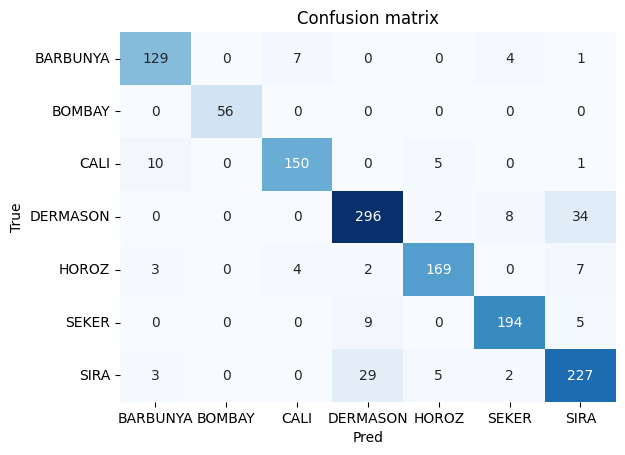

In [16]:
## Plot confusion matrix
fig, ax = plt.subplots()
sns.heatmap(cm, annot=True, fmt="d", ax=ax, cmap=plt.cm.Blues, cbar=False)
ax.set(
    xlabel="Pred",
    ylabel="True",
    xticklabels=classes,
    yticklabels=classes,
    title="Confusion matrix",
)
plt.yticks(rotation=0)

In [17]:
# one-hot encoding
label_binarizer = LabelBinarizer()
label_binarizer.fit(y_train)
y_onehot_test = label_binarizer.transform(y_test)
print(y_onehot_test.shape)  # (n_samples, n_classes)
y_onehot_test[0,:]

(1362, 7)


array([0, 0, 0, 0, 0, 0, 1])

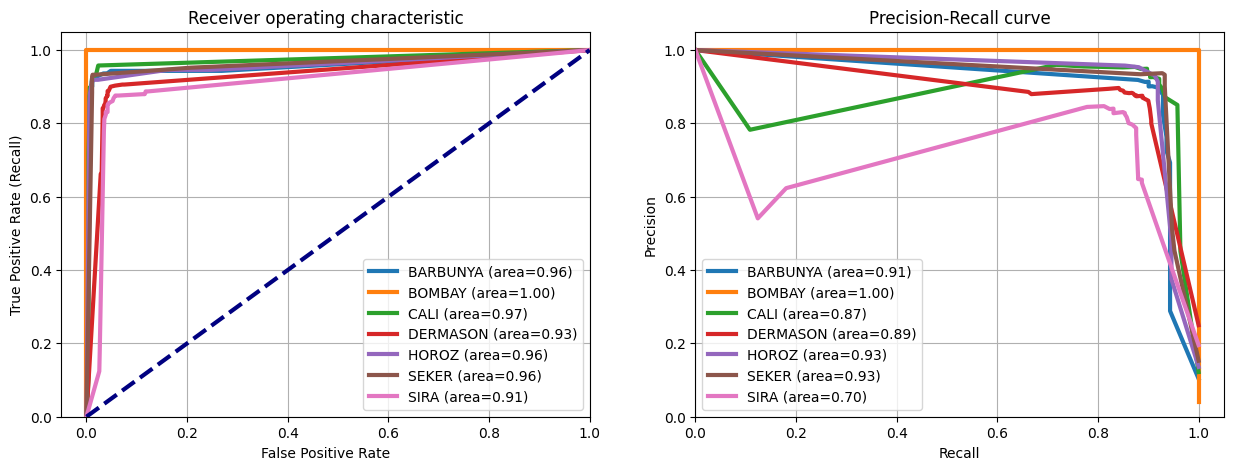

In [18]:
# plot ROC curve and precision-recall curve
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
## Plot roc
for i in range(len(classes)):
    fpr, tpr, thresholds = roc_curve(y_onehot_test[:, i], y_pred_DT_proba[:, i])
    ax[0].plot(
        fpr, tpr, lw=3, label="{0} (area={1:0.2f})".format(classes[i], auc(fpr, tpr))
    )
ax[0].plot([0, 1], [0, 1], color="navy", lw=3, linestyle="--")
ax[0].set(
    xlim=[-0.05, 1.0],
    ylim=[0.0, 1.05],
    xlabel="False Positive Rate",
    ylabel="True Positive Rate (Recall)",
    title="Receiver operating characteristic",
)
ax[0].legend(loc="lower right")
ax[0].grid(True)

## Plot precision-recall curve
for i in range(len(classes)):
    precision, recall, thresholds = precision_recall_curve(
        y_onehot_test[:, i], y_pred_DT_proba[:, i]
    )
    ax[1].plot(
        recall,
        precision,
        lw=3,
        label="{0} (area={1:0.2f})".format(classes[i], auc(recall, precision)),
    )
ax[1].set(
    xlim=[0.0, 1.05],
    ylim=[0.0, 1.05],
    xlabel="Recall",
    ylabel="Precision",
    title="Precision-Recall curve",
)
ax[1].legend(loc="best")
ax[1].grid(True)

plt.show()

## 2.2 Logistic Regression

In [19]:
LogisticRegressionModel = LogisticRegression(C=1, solver='newton-cg', class_weight='balanced', multi_class='multinomial',
                            fit_intercept=True, max_iter=100, random_state=44)
LogisticRegressionModel.fit(X_train, y_train)

print(LogisticRegressionModel.score(X_train, y_train))
print(LogisticRegressionModel.score(X_test, y_test))

0.9152583884398726
0.9140969162995595


c:\Users\collin\anaconda3\envs\bi_final\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


In [20]:
y_pred_LR= LogisticRegressionModel.predict(X_test)
y_pred_LR_proba = LogisticRegressionModel.predict_proba(X_test)

In [21]:
## Accuracy, Precision, Recall, F1-score
print(classification_report(y_test, y_pred_LR))

              precision    recall  f1-score   support

    BARBUNYA       0.92      0.87      0.90       141
      BOMBAY       1.00      1.00      1.00        56
        CALI       0.91      0.93      0.92       166
    DERMASON       0.92      0.91      0.92       340
       HOROZ       0.95      0.95      0.95       185
       SEKER       0.92      0.96      0.94       208
        SIRA       0.85      0.86      0.86       266

    accuracy                           0.91      1362
   macro avg       0.93      0.92      0.92      1362
weighted avg       0.91      0.91      0.91      1362



In [22]:
classes = LogisticRegressionModel.classes_
cm_LR= confusion_matrix(y_test, y_pred_LR)
cm_LR

array([[123,   0,  11,   0,   0,   3,   4],
       [  0,  56,   0,   0,   0,   0,   0],
       [  4,   0, 154,   0,   4,   1,   3],
       [  1,   0,   0, 308,   0,   5,  26],
       [  1,   0,   3,   2, 175,   0,   4],
       [  2,   0,   0,   4,   0, 200,   2],
       [  2,   0,   2,  19,   6,   8, 229]], dtype=int64)

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5]),
 [Text(0, 0.5, 'BARBUNYA'),
  Text(0, 1.5, 'BOMBAY'),
  Text(0, 2.5, 'CALI'),
  Text(0, 3.5, 'DERMASON'),
  Text(0, 4.5, 'HOROZ'),
  Text(0, 5.5, 'SEKER'),
  Text(0, 6.5, 'SIRA')])

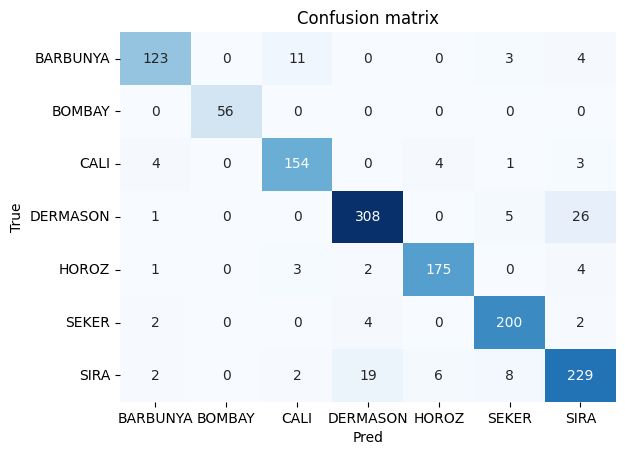

In [23]:
## Plot confusion matrix
fig, ax = plt.subplots()
sns.heatmap(cm_LR, annot=True, fmt="d", ax=ax, cmap=plt.cm.Blues, cbar=False)
ax.set(
    xlabel="Pred",
    ylabel="True",
    xticklabels=classes,
    yticklabels=classes,
    title="Confusion matrix",
)
plt.yticks(rotation=0)

In [24]:
# one-hot encoding
label_binarizer_LR = LabelBinarizer()
label_binarizer_LR.fit(y_train)
y_onehot_test = label_binarizer_LR.transform(y_test)
print(y_onehot_test.shape)  # (n_samples, n_classes)
y_onehot_test[0,:]

(1362, 7)


array([0, 0, 0, 0, 0, 0, 1])

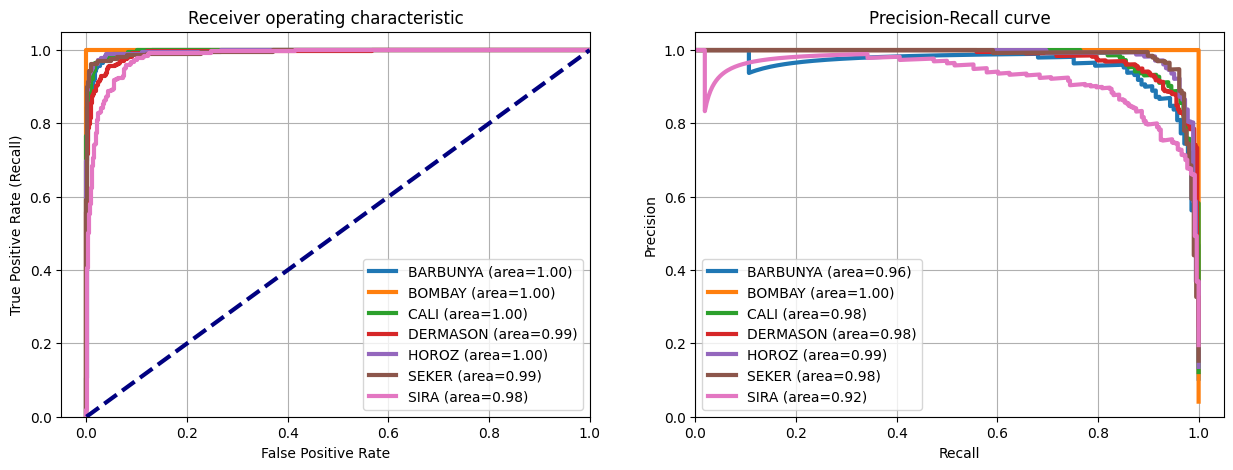

In [25]:
# plot ROC curve and precision-recall curve
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
## Plot roc
for i in range(len(classes)):
    fpr, tpr, thresholds = roc_curve(y_onehot_test[:, i], y_pred_LR_proba[:, i])
    ax[0].plot(
        fpr, tpr, lw=3, label="{0} (area={1:0.2f})".format(classes[i], auc(fpr, tpr))
    )
ax[0].plot([0, 1], [0, 1], color="navy", lw=3, linestyle="--")
ax[0].set(
    xlim=[-0.05, 1.0],
    ylim=[0.0, 1.05],
    xlabel="False Positive Rate",
    ylabel="True Positive Rate (Recall)",
    title="Receiver operating characteristic",
)
ax[0].legend(loc="lower right")
ax[0].grid(True)

## Plot precision-recall curve
for i in range(len(classes)):
    precision, recall, thresholds = precision_recall_curve(
        y_onehot_test[:, i], y_pred_LR_proba[:, i]
    )
    ax[1].plot(
        recall,
        precision,
        lw=3,
        label="{0} (area={1:0.2f})".format(classes[i], auc(recall, precision)),
    )
ax[1].set(
    xlim=[0.0, 1.05],
    ylim=[0.0, 1.05],
    xlabel="Recall",
    ylabel="Precision",
    title="Precision-Recall curve",
)
ax[1].legend(loc="best")
ax[1].grid(True)

plt.show()

## 2.3 Random Forest

In [26]:
RandomForestClassifierModel = RandomForestClassifier(criterion = 'gini', max_depth=11, n_estimators=100, random_state=44)
RandomForestClassifierModel.fit(X_train, y_train)

print('RandomForestClassifierModel Train Score is : ' , RandomForestClassifierModel.score(X_train, y_train))
print('RandomForestClassifierModel Test Score is : ' , RandomForestClassifierModel.score(X_test, y_test))

RandomForestClassifierModel Train Score is :  0.9731406645440445
RandomForestClassifierModel Test Score is :  0.9251101321585903


In [27]:
y_pred_RF = RandomForestClassifierModel.predict(X_test)
y_pred_RF_proba = RandomForestClassifierModel.predict_proba(X_test)

In [28]:
## Accuracy, Precision, Recall, F1-score
print(classification_report(y_test, y_pred_RF))

              precision    recall  f1-score   support

    BARBUNYA       0.98      0.90      0.94       141
      BOMBAY       1.00      1.00      1.00        56
        CALI       0.93      0.94      0.93       166
    DERMASON       0.91      0.93      0.92       340
       HOROZ       0.94      0.94      0.94       185
       SEKER       0.96      0.95      0.96       208
        SIRA       0.87      0.87      0.87       266

    accuracy                           0.93      1362
   macro avg       0.94      0.93      0.94      1362
weighted avg       0.93      0.93      0.93      1362



In [29]:
classes = RandomForestClassifierModel.classes_
cm_RF = confusion_matrix(y_test, y_pred_RF)
cm_RF

array([[127,   0,  10,   0,   0,   3,   1],
       [  0,  56,   0,   0,   0,   0,   0],
       [  2,   0, 156,   0,   5,   1,   2],
       [  0,   0,   0, 317,   0,   2,  21],
       [  0,   0,   2,   2, 174,   0,   7],
       [  0,   0,   0,   5,   0, 198,   5],
       [  1,   0,   0,  25,   6,   2, 232]], dtype=int64)

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5]),
 [Text(0, 0.5, 'BARBUNYA'),
  Text(0, 1.5, 'BOMBAY'),
  Text(0, 2.5, 'CALI'),
  Text(0, 3.5, 'DERMASON'),
  Text(0, 4.5, 'HOROZ'),
  Text(0, 5.5, 'SEKER'),
  Text(0, 6.5, 'SIRA')])

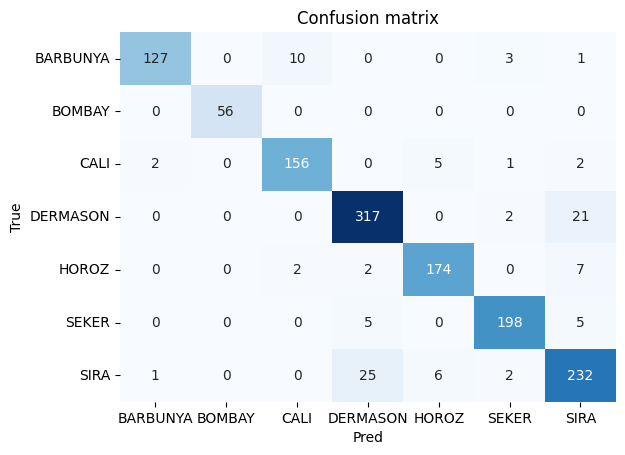

In [30]:
## Plot confusion matrix
fig, ax = plt.subplots()
sns.heatmap(cm_RF, annot=True, fmt="d", ax=ax, cmap=plt.cm.Blues, cbar=False)
ax.set(
    xlabel="Pred",
    ylabel="True",
    xticklabels=classes,
    yticklabels=classes,
    title="Confusion matrix",
)
plt.yticks(rotation=0)

In [31]:
# one-hot encoding
label_binarizer_RF = LabelBinarizer()
label_binarizer_RF.fit(y_train)
y_onehot_test = label_binarizer_RF.transform(y_test)
print(y_onehot_test.shape)  # (n_samples, n_classes)
y_onehot_test[0,:]

(1362, 7)


array([0, 0, 0, 0, 0, 0, 1])

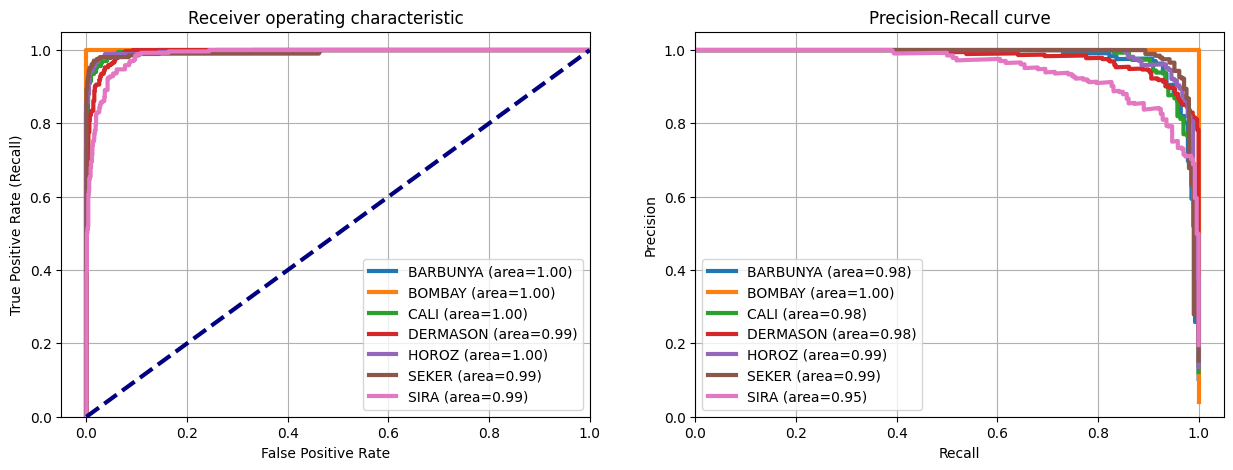

In [32]:
# plot ROC curve and precision-recall curve
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
## Plot roc
for i in range(len(classes)):
    fpr, tpr, thresholds = roc_curve(y_onehot_test[:, i], y_pred_RF_proba[:, i])
    ax[0].plot(
        fpr, tpr, lw=3, label="{0} (area={1:0.2f})".format(classes[i], auc(fpr, tpr))
    )
ax[0].plot([0, 1], [0, 1], color="navy", lw=3, linestyle="--")
ax[0].set(
    xlim=[-0.05, 1.0],
    ylim=[0.0, 1.05],
    xlabel="False Positive Rate",
    ylabel="True Positive Rate (Recall)",
    title="Receiver operating characteristic",
)
ax[0].legend(loc="lower right")
ax[0].grid(True)

## Plot precision-recall curve
for i in range(len(classes)):
    precision, recall, thresholds = precision_recall_curve(
        y_onehot_test[:, i], y_pred_RF_proba[:, i]
    )
    ax[1].plot(
        recall,
        precision,
        lw=3,
        label="{0} (area={1:0.2f})".format(classes[i], auc(recall, precision)),
    )
ax[1].set(
    xlim=[0.0, 1.05],
    ylim=[0.0, 1.05],
    xlabel="Recall",
    ylabel="Precision",
    title="Precision-Recall curve",
)
ax[1].legend(loc="best")
ax[1].grid(True)

plt.show()

## 2.4 Gradiant Boosting Classifier

In [33]:
GBCModel = GradientBoostingClassifier(n_estimators=50, max_depth=5, learning_rate=0.12, random_state=0)
GBCModel.fit(X_train, y_train)
print('GBCModel Train Score is : ' , GBCModel.score(X_train, y_train))
print('GBCModel Test Score is : ' , GBCModel.score(X_test, y_test))

GBCModel Train Score is :  0.9790186954037065
GBCModel Test Score is :  0.9273127753303965


In [34]:
y_pred_GBC = GBCModel.predict(X_test)
y_pred_GBC_proba = GBCModel.predict_proba(X_test)

In [35]:
print(classification_report(y_test, y_pred_GBC))

              precision    recall  f1-score   support

    BARBUNYA       0.95      0.92      0.94       141
      BOMBAY       1.00      1.00      1.00        56
        CALI       0.97      0.92      0.95       166
    DERMASON       0.91      0.93      0.92       340
       HOROZ       0.94      0.96      0.95       185
       SEKER       0.96      0.96      0.96       208
        SIRA       0.86      0.87      0.87       266

    accuracy                           0.93      1362
   macro avg       0.94      0.94      0.94      1362
weighted avg       0.93      0.93      0.93      1362



In [36]:
classes = GBCModel.classes_
cm_GBC = confusion_matrix(y_test, y_pred_GBC)
cm_GBC

array([[130,   0,   4,   0,   0,   3,   4],
       [  0,  56,   0,   0,   0,   0,   0],
       [  3,   0, 153,   0,   6,   1,   3],
       [  0,   0,   0, 315,   0,   2,  23],
       [  1,   0,   0,   2, 177,   0,   5],
       [  0,   0,   0,   5,   0, 200,   3],
       [  3,   0,   0,  23,   5,   3, 232]], dtype=int64)

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5]),
 [Text(0, 0.5, 'BARBUNYA'),
  Text(0, 1.5, 'BOMBAY'),
  Text(0, 2.5, 'CALI'),
  Text(0, 3.5, 'DERMASON'),
  Text(0, 4.5, 'HOROZ'),
  Text(0, 5.5, 'SEKER'),
  Text(0, 6.5, 'SIRA')])

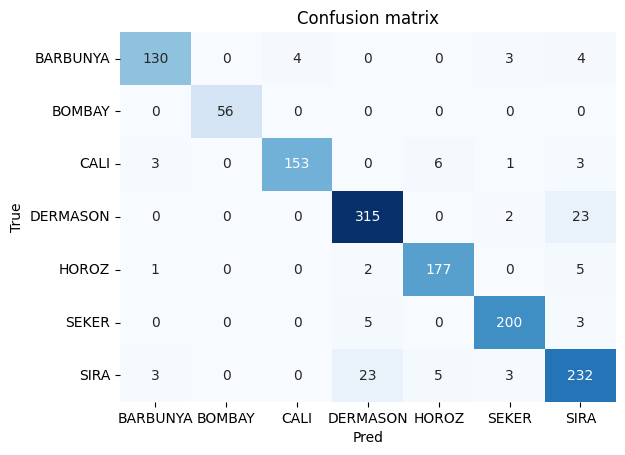

In [37]:
## Plot confusion matrix
fig, ax = plt.subplots()
sns.heatmap(cm_GBC, annot=True, fmt="d", ax=ax, cmap=plt.cm.Blues, cbar=False)
ax.set(
    xlabel="Pred",
    ylabel="True",
    xticklabels=classes,
    yticklabels=classes,
    title="Confusion matrix",
)
plt.yticks(rotation=0)

In [38]:
# one-hot encoding
label_binarizer_GBC = LabelBinarizer()
label_binarizer_GBC.fit(y_train)
y_onehot_test = label_binarizer_GBC.transform(y_test)
print(y_onehot_test.shape)  # (n_samples, n_classes)
y_onehot_test[0,:]

(1362, 7)


array([0, 0, 0, 0, 0, 0, 1])

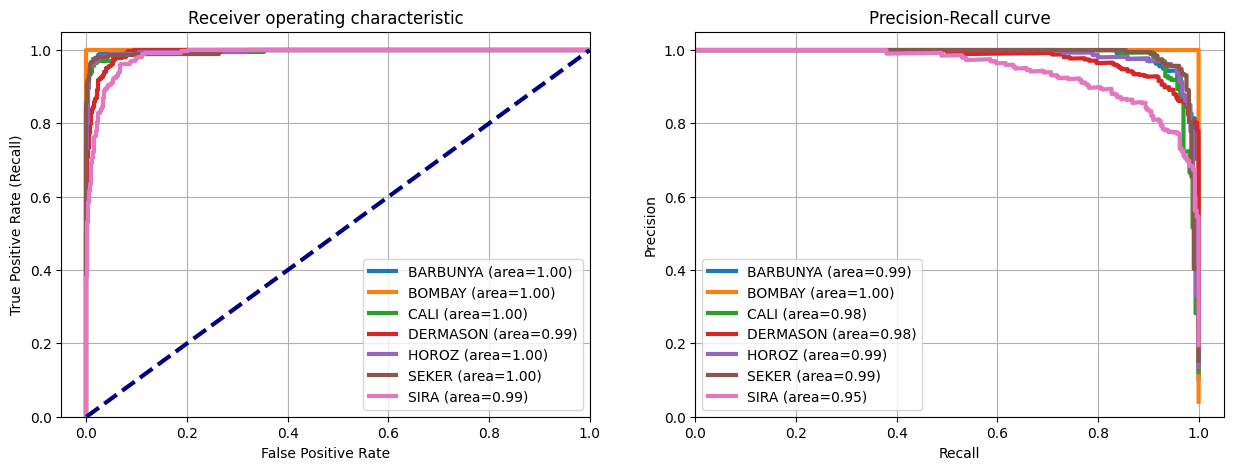

In [39]:
# plot ROC curve and precision-recall curve
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
## Plot roc
for i in range(len(classes)):
    fpr, tpr, thresholds = roc_curve(y_onehot_test[:, i], y_pred_GBC_proba[:, i])
    ax[0].plot(
        fpr, tpr, lw=3, label="{0} (area={1:0.2f})".format(classes[i], auc(fpr, tpr))
    )
ax[0].plot([0, 1], [0, 1], color="navy", lw=3, linestyle="--")
ax[0].set(
    xlim=[-0.05, 1.0],
    ylim=[0.0, 1.05],
    xlabel="False Positive Rate",
    ylabel="True Positive Rate (Recall)",
    title="Receiver operating characteristic",
)
ax[0].legend(loc="lower right")
ax[0].grid(True)

## Plot precision-recall curve
for i in range(len(classes)):
    precision, recall, thresholds = precision_recall_curve(
        y_onehot_test[:, i], y_pred_GBC_proba[:, i]
    )
    ax[1].plot(
        recall,
        precision,
        lw=3,
        label="{0} (area={1:0.2f})".format(classes[i], auc(recall, precision)),
    )
ax[1].set(
    xlim=[0.0, 1.05],
    ylim=[0.0, 1.05],
    xlabel="Recall",
    ylabel="Precision",
    title="Precision-Recall curve",
)
ax[1].legend(loc="best")
ax[1].grid(True)

plt.show()

# 3. Voting Strategy Comparison (Soft vs. Hard)

## 3.1 Soft

In [40]:
VotingClassifierModel = VotingClassifier(estimators=[('RFModel',RandomForestClassifierModel),
                                                     ('GBCModel',GBCModel),
                                                     ('LRModel',LogisticRegressionModel),
                                                     ('TDCModel',DecisionTreeClassifierModel)],
                                         voting='soft')
VotingClassifierModel.fit(X_train, y_train)
print('VotingClassifierModel Train Score is : ' , VotingClassifierModel.score(X_train, y_train))
print('VotingClassifierModel Test Score is : ' , VotingClassifierModel.score(X_test, y_test))

c:\Users\collin\anaconda3\envs\bi_final\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


VotingClassifierModel Train Score is :  0.979181974038697
VotingClassifierModel Test Score is :  0.9243759177679882


In [41]:
y_pred_VS = VotingClassifierModel.predict(X_test)
y_pred_VS_proba = VotingClassifierModel.predict_proba(X_test)

In [42]:
## Accuracy, Precision, Recall, F1-score
print(classification_report(y_test, y_pred_VS))

              precision    recall  f1-score   support

    BARBUNYA       0.96      0.93      0.95       141
      BOMBAY       1.00      1.00      1.00        56
        CALI       0.95      0.93      0.94       166
    DERMASON       0.90      0.92      0.91       340
       HOROZ       0.95      0.94      0.95       185
       SEKER       0.96      0.94      0.95       208
        SIRA       0.86      0.88      0.87       266

    accuracy                           0.92      1362
   macro avg       0.94      0.94      0.94      1362
weighted avg       0.93      0.92      0.92      1362



In [43]:
classes = VotingClassifierModel.classes_
cm_VS = confusion_matrix(y_test, y_pred_VS)
cm_VS

array([[131,   0,   5,   0,   0,   4,   1],
       [  0,  56,   0,   0,   0,   0,   0],
       [  2,   0, 155,   0,   5,   1,   3],
       [  0,   0,   0, 314,   0,   2,  24],
       [  1,   0,   2,   2, 174,   0,   6],
       [  0,   0,   0,   8,   0, 196,   4],
       [  2,   0,   1,  24,   4,   2, 233]], dtype=int64)

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5]),
 [Text(0, 0.5, 'BARBUNYA'),
  Text(0, 1.5, 'BOMBAY'),
  Text(0, 2.5, 'CALI'),
  Text(0, 3.5, 'DERMASON'),
  Text(0, 4.5, 'HOROZ'),
  Text(0, 5.5, 'SEKER'),
  Text(0, 6.5, 'SIRA')])

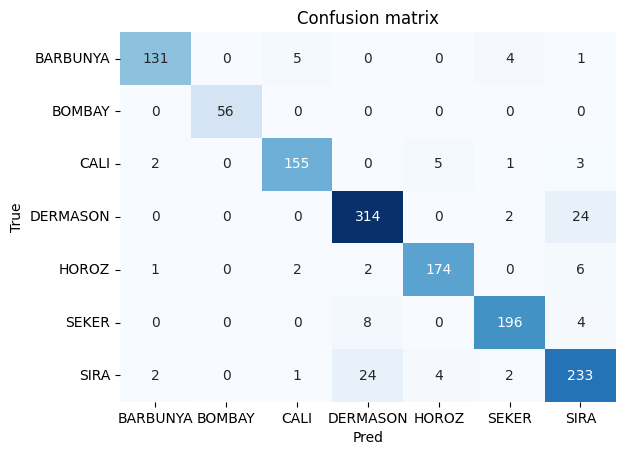

In [44]:
## Plot confusion matrix
fig, ax = plt.subplots()
sns.heatmap(cm_VS, annot=True, fmt="d", ax=ax, cmap=plt.cm.Blues, cbar=False)
ax.set(
    xlabel="Pred",
    ylabel="True",
    xticklabels=classes,
    yticklabels=classes,
    title="Confusion matrix",
)
plt.yticks(rotation=0)

In [45]:
# one-hot encoding
label_binarizer_VS = LabelBinarizer()
label_binarizer_VS.fit(y_train)
y_onehot_test = label_binarizer_VS.transform(y_test)
print(y_onehot_test.shape)  # (n_samples, n_classes)
y_onehot_test[0,:]

(1362, 7)


array([0, 0, 0, 0, 0, 0, 1])

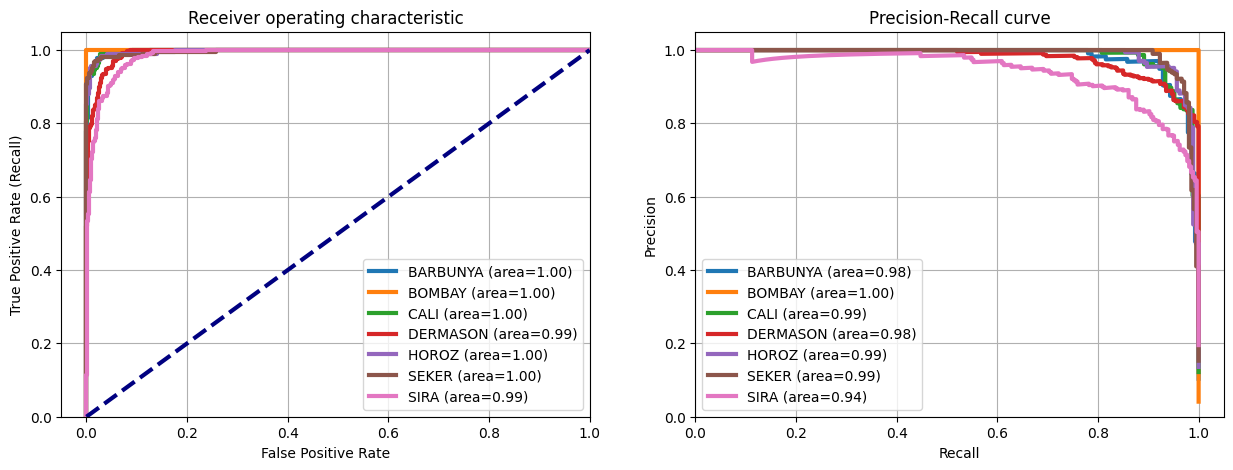

In [46]:
# plot ROC curve and precision-recall curve
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
## Plot roc
for i in range(len(classes)):
    fpr, tpr, thresholds = roc_curve(y_onehot_test[:, i], y_pred_VS_proba[:, i])
    ax[0].plot(
        fpr, tpr, lw=3, label="{0} (area={1:0.2f})".format(classes[i], auc(fpr, tpr))
    )
ax[0].plot([0, 1], [0, 1], color="navy", lw=3, linestyle="--")
ax[0].set(
    xlim=[-0.05, 1.0],
    ylim=[0.0, 1.05],
    xlabel="False Positive Rate",
    ylabel="True Positive Rate (Recall)",
    title="Receiver operating characteristic",
)
ax[0].legend(loc="lower right")
ax[0].grid(True)

## Plot precision-recall curve
for i in range(len(classes)):
    precision, recall, thresholds = precision_recall_curve(
        y_onehot_test[:, i], y_pred_VS_proba[:, i]
    )
    ax[1].plot(
        recall,
        precision,
        lw=3,
        label="{0} (area={1:0.2f})".format(classes[i], auc(recall, precision)),
    )
ax[1].set(
    xlim=[0.0, 1.05],
    ylim=[0.0, 1.05],
    xlabel="Recall",
    ylabel="Precision",
    title="Precision-Recall curve",
)
ax[1].legend(loc="best")
ax[1].grid(True)

plt.show()

## 3.2 Hard

In [47]:
VotingClassifierModelh = VotingClassifier(estimators=[('RFModel',RandomForestClassifierModel),
                                                     ('GBCModel',GBCModel),
                                                     ('LRModel',LogisticRegressionModel),
                                                     ('TDCModel',DecisionTreeClassifierModel)],
                                         voting='hard')
VotingClassifierModelh.fit(X_train, y_train)
print('VotingClassifierModel Train Score is : ' , VotingClassifierModelh.score(X_train, y_train))
print('VotingClassifierModel Test Score is : ' , VotingClassifierModelh.score(X_test, y_test))

c:\Users\collin\anaconda3\envs\bi_final\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


VotingClassifierModel Train Score is :  0.9744468936239693
VotingClassifierModel Test Score is :  0.9258443465491923


In [48]:
y_pred_VH = VotingClassifierModelh.predict(X_test)

In [49]:
## Accuracy, Precision, Recall, F1-score
print(classification_report(y_test, y_pred_VH))

              precision    recall  f1-score   support

    BARBUNYA       0.94      0.93      0.94       141
      BOMBAY       1.00      1.00      1.00        56
        CALI       0.96      0.92      0.94       166
    DERMASON       0.91      0.94      0.92       340
       HOROZ       0.95      0.95      0.95       185
       SEKER       0.96      0.95      0.95       208
        SIRA       0.87      0.86      0.87       266

    accuracy                           0.93      1362
   macro avg       0.94      0.94      0.94      1362
weighted avg       0.93      0.93      0.93      1362



In [50]:
classes = VotingClassifierModelh.classes_
cm_VH = confusion_matrix(y_test, y_pred_VH)
cm_VH

array([[131,   0,   5,   0,   0,   3,   2],
       [  0,  56,   0,   0,   0,   0,   0],
       [  4,   0, 153,   0,   5,   1,   3],
       [  0,   0,   0, 319,   0,   2,  19],
       [  1,   0,   2,   2, 175,   0,   5],
       [  0,   0,   0,   6,   0, 197,   5],
       [  3,   0,   0,  25,   5,   3, 230]], dtype=int64)

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5]),
 [Text(0, 0.5, 'BARBUNYA'),
  Text(0, 1.5, 'BOMBAY'),
  Text(0, 2.5, 'CALI'),
  Text(0, 3.5, 'DERMASON'),
  Text(0, 4.5, 'HOROZ'),
  Text(0, 5.5, 'SEKER'),
  Text(0, 6.5, 'SIRA')])

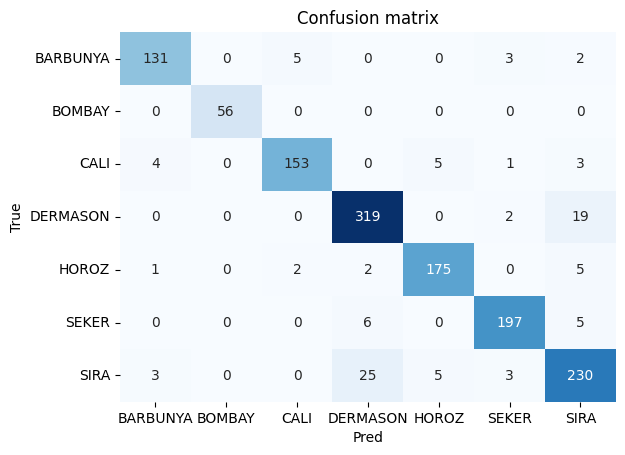

In [51]:
## Plot confusion matrix
fig, ax = plt.subplots()
sns.heatmap(cm_VH, annot=True, fmt="d", ax=ax, cmap=plt.cm.Blues, cbar=False)
ax.set(
    xlabel="Pred",
    ylabel="True",
    xticklabels=classes,
    yticklabels=classes,
    title="Confusion matrix",
)
plt.yticks(rotation=0)

# 4. Conclusion

在這次的試驗從random forest開始就已經算是集成式學習，很明顯已經比單一模型 Decision Tree、Logistic Regression 來得好 ，但在最後把所有模型集成起來並沒有變得更好，故得知將所有模型集成起來並不一定會得到更好的結果。